# Exercise 5: Peceptual Bistability

## Céline Budding && Dorothea Müller 

In [1]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

%matplotlib inline

## 1. Binocular Rivalry

### 1.

In [2]:
def heaviside_step(x):
    if x >= 0:
        return 1.0
    else:
        return 0.0

def laing_chow(x, t, I1, I2, alpha = 0.2, beta = 0.4, phi = 0.4, tau = 20, g1 = 1, g2 = 1):
    u1 = x[0]
    a1 = x[1]
    u2 = x[2]
    a2 = x[3]

    du1_dt = - u1 + heaviside_step(alpha * u1 * g1 - beta * u2 * g2 - a1 + I1)
    du2_dt = - u2 + heaviside_step(alpha * u2 * g2 - beta * u1 * g1 - a2 + I2)
    da1_dt = (-a1 + phi * heaviside_step(alpha * u1 * g1 - beta * u2 * g2 - a1 + I1))/tau
    da2_dt = (-a2 + phi * heaviside_step(alpha * u2 * g2 - beta * u1 * g1 - a2 + I2))/tau

    return [du1_dt, da1_dt, du2_dt, da2_dt]

In [3]:
# u1 = 1, a1 = 0.1, u2 = 0, a2 = 0.25
x0 = [1.0, 0.1, 0.0, 0.25]
t = np.linspace(0, 500, 5001)
I1 = 0.43
I2 = 0.5
a = odeint(laing_chow, x0, t, args=(I1, I2))

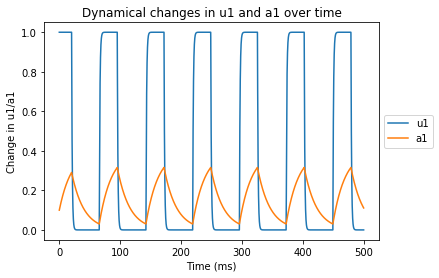

In [4]:
plt.plot(t, a[:, 0], label = 'u1')
plt.plot(t, a[:, 1], label = 'a1')
plt.xlabel('Time (ms)')
plt.ylabel('Change in u1/a1')
plt.title('Dynamical changes in u1 and a1 over time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

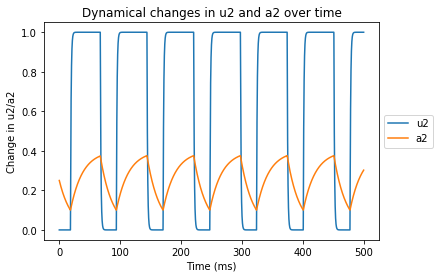

In [5]:
plt.plot(t, a[:, 2], label = 'u2')
plt.plot(t, a[:, 3], label = 'a2')
plt.xlabel('Time (ms)')
plt.ylabel('Change in u2/a2')
plt.title('Dynamical changes in u2 and a2 over time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### 2.

In [6]:
def dominance_durations(x1, x2, t):
    '''Returns the dominance periods where x1 > x2'''
    m_greater = (x1 > x2).astype(int)
    asign = np.sign(m_greater)
    signchange = ((np.roll(asign, 1) - asign) != 0).astype(bool)
    signchange[0] = False
    
    times_change = t[signchange]
    times_change = np.concatenate(([t[0]], times_change, [t[-1]]))

    if x1[0] > x2[0]:
        start = 0
    else: 
        start = 1
    
    dominance = np.diff(t[signchange])[start::2]
    return dominance

In [7]:
dominance_durations(a[:, 2], a[:, 0], t)

array([28. , 28. , 28. , 28. , 28.1, 28. ])

There is not a big difference between T1 in the paper and T1 found here (between 25 - 30 at I = 0.43). Only the first time is different, possibly because not a whole period from the starting time is considered. For the rest, the time seems to correspond to the time in the plot. Our simulations are insufficient to confirm that the dominance period times change with changing input current. 

### 3. 

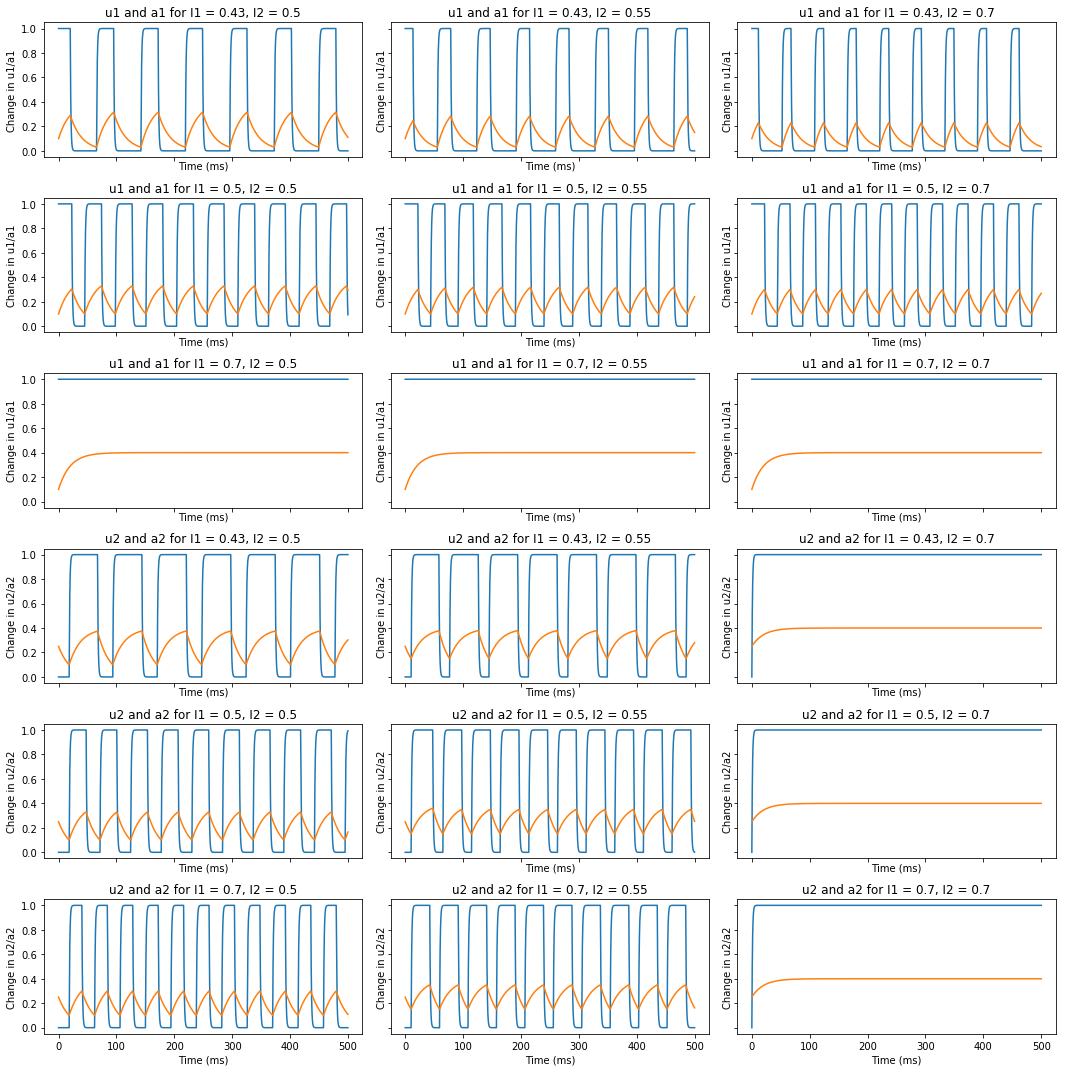

In [8]:
# The input at -alpha + beta + phi is 0.6, so we take values above this and between this and the original values
I1_values = [0.43, 0.5, 0.7]
I2_values = [0.5, 0.55, 0.7]

dominance_periods = []
fig, axs = plt.subplots(6, 3, figsize = (15, 15), sharex = True, sharey = True)
for i, I1 in enumerate(I1_values): 
    for j, I2 in enumerate(I2_values): 
        a = odeint(laing_chow, x0, t, args=(I1, I2))
        
        dominance_periods.append(dominance_durations(a[:, 2], a[:, 0], t))
        
        axs[i][j].plot(t, a[:, 0])
        axs[i][j].plot(t, a[:, 1])
        axs[i][j].set_xlabel('Time (ms)')
        axs[i][j].set_ylabel('Change in u1/a1')
        axs[i][j].set_title('u1 and a1 for I1 = {}, I2 = {}'.format(I1, I2))
        
        axs[i+3][j].plot(t, a[:, 2])
        axs[i+3][j].plot(t, a[:, 3])
        axs[i+3][j].set_xlabel('Time (ms)')
        axs[i+3][j].set_ylabel('Change in u2/a2')
        axs[i+3][j].set_title('u2 and a2 for I1 = {}, I2 = {}'.format(I1, I2))
        
# plt.suptitle('u1 and a1 (top three rows), u2 and a2 (bottom three rows)')        
fig.tight_layout()

These figures show that for a significantly higher input I1 and I2 (both 0.7), the oscillations for both populations stop and there is high activity in both populations. For intermediate values, e.g. intermediate I1 and I2, the populations still show oscillations, but with much shorter dominance periods for each of them, so the oscillations become faster. When only one of the currents is above the threshold and the other is at low or intermediate values, one population shows spiking, whereas the other population has persisting activity (e.g. I1 = 0.7, I2 = 0.55).

In [9]:
for i, period in enumerate(dominance_periods): 
    print(period)

[28.  28.  28.  28.  28.1 28. ]
[20.5 20.6 20.6 20.6 20.6 20.6 20.6]
[]
[26.5 26.5 26.5 26.5 26.4 26.5 26.5 26.4 26.5]
[21.  20.1 20.1 20.1 20.1 20.1 20.1 20.1 20. ]
[0.7 0.3 0.6]
[130.9]
[ 1.  44.1 42.8  1.   0.7  1.4 43.6 43.4  1.1 44.   0.8  1.4 42.9  1.
 40.5  2.7  0.8 37.6  3.8 46.   1.9]
[ 1.6  5.   2.9  2.   4.4  0.2  0.8  0.6  0.3  6.2  1.9  3.7  7.9 12.6
  0.4  5.2  5.5  2.   2.3 13.1 18.3 13.2 19.1  4.3 49.8 24.7]


The dominance periods seem consistent with the data in that they decrease for increasing currents, as would be expected from the analytical solution. TODO fix function dominance times, doesn't make sense here 

## 2.

### 1. 

It is a stochastic model, so the equations are not always differentiable and cannot be solved by the odeint algorithm

### 2.

In [10]:
def euler_maruyama(ffun, gfun, x0, t, **args):
    """Euler Maruyama method for stochastic differential equations. x0 must be a list."""
    dts = np.diff(t).astype(float)
    res = np.zeros((len(t), len(x0)))
    res[0] = x0
    
    for i in range(1, len(t)-1):
        # Euler part.
        res[i] = np.multiply(ffun(res[i-1], t, **args), dts[i]) + res[i-1]
        
        gfun_res = gfun(res[i-1], t, **args)
        if isinstance(gfun_res, float) or isinstance(gfun_res, int):
            gfun_res = np.repeat(gfun_res, res[i].shape[0])
        
        # For each component, sample from random normal distribution!
        rand_vals = np.random.normal(0, 1, res[i].shape[0])
        
        for j, _ in enumerate(res[i]):
            # For each component, sample noise independently from random normal distribution.
            res[i, j] = res[i, j] + gfun_res[j] * rand_vals[j] * np.sqrt(dts[i])
    return res

In [11]:
# Testing method with previous function.
gfun_laing_chow = lambda x, t, **args : 0
a = euler_maruyama(laing_chow, gfun_laing_chow, x0, t, I1 = 0.43, I2 = 0.5)
a.shape

(5001, 4)

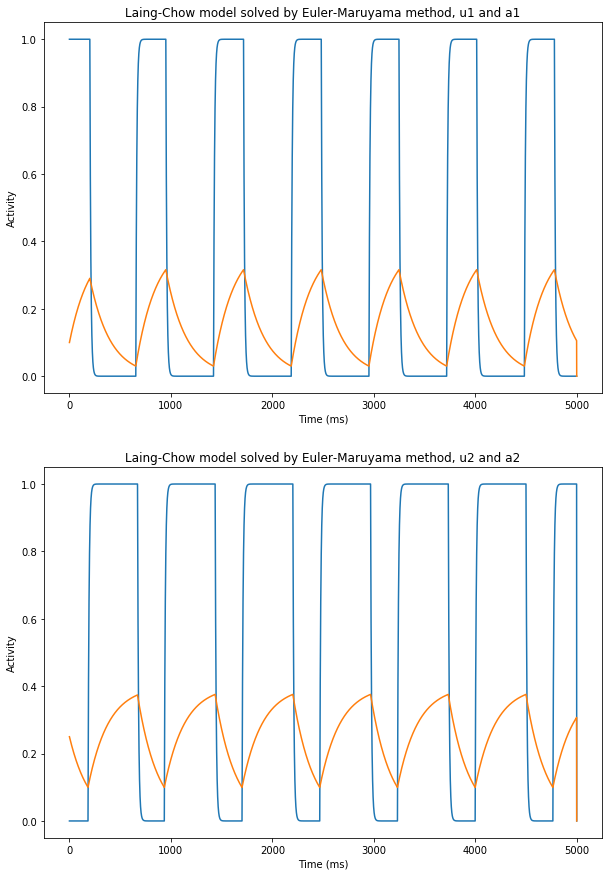

In [12]:
fig, axs = plt.subplots(2, 1, figsize = (10, 15))
axs[0].plot(a[:, 0])
axs[0].plot(a[:, 1])
axs[0].set_xlabel('Time (ms)')
axs[0].set_ylabel('Activity')
axs[0].set_title('Laing-Chow model solved by Euler-Maruyama method, u1 and a1')

axs[1].plot(a[:, 2])
axs[1].plot(a[:, 3])
axs[1].set_xlabel('Time (ms)')
axs[1].set_ylabel('Activity')
axs[1].set_title('Laing-Chow model solved by Euler-Maruyama method, u2 and a2')

plt.show()

### 3.

The starting value for the process is not defined so we set it to 0.

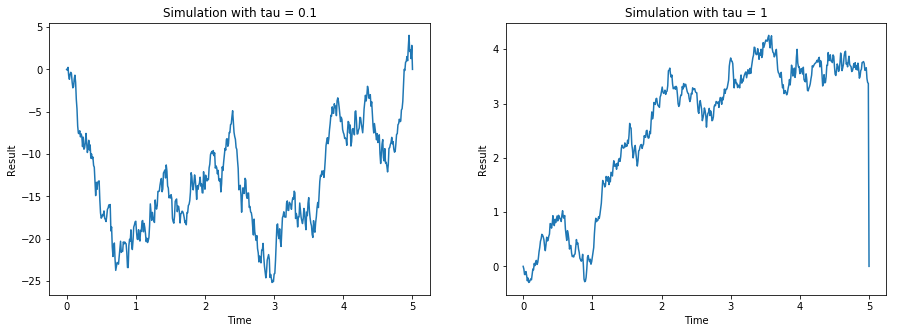

In [13]:
taus = [0.1, 1]
t = np.linspace(0, 5, 5 * 100 + 1)
x0 = [0]

ffun = lambda x, t, **args : 0
gfun = lambda x, t, **args : 1/tau

fig, axs = plt.subplots(1, 2, figsize = (15, 5))
for i, tau in enumerate(taus):
    res = euler_maruyama(ffun, gfun, x0, t)
    axs[i].plot(t, res)
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Result')
    axs[i].set_title('Simulation with tau = {}'.format(tau))

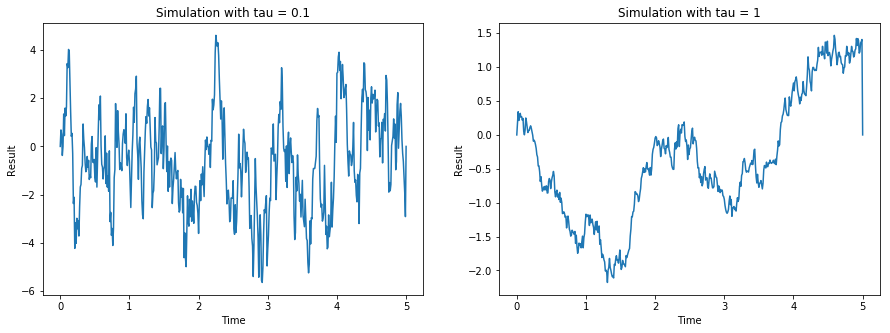

In [14]:
ffun = lambda x, t, **args : -x/tau

fig, axs = plt.subplots(1, 2, figsize = (15, 5))
for i, tau in enumerate(taus):
    res = euler_maruyama(ffun, gfun, x0, t)
    axs[i].plot(t, res)
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Result')
    axs[i].set_title('Simulation with tau = {}'.format(tau))

**Compare the results of the four simulations. What is similar? What
is different?**

(hint: Wiener processes and Ornstein-Uhlenbeck processes)

off to sleep yeah, leaving it as todo 

The Wiener process is often also called Brownian motion or a random walk. An Ornstein-Uhlenbeck process, on the other hand, can be seen as a dampened random walk, or the dynamics of a Brownian particle with friction. This is a Wiener process with added variable. Therefore, we could say that the first two simulations are a Wiener process, as the ffunc is 0, and the other two simulated processes are Ornstein-Uhlenbeck processes. 

The similarities between the two processes are that the processes are clearly random and stochastic, so the movement changes in every time step. However, if we look at the two different processes at tau = 0.1, we can see that there are many more oscillations for the second process than for the random walk, which has slower oscillations. This might be due to the ffunc that is not 0 in the second process, as this changes the function in the direction -x/tau, leading to relatively larger changes in each time step than for the Wiener process. The simulations for tau = 1 look more similar, possibly because the term -x/tau will be relatively smaller and will thus have less influence on the final result. Nevertheless, the values still seem to fluctuate more around a certain value (1 in this case), than for the Wiener process, where the points get further and further from the starting point.

### 4. 

In [15]:
# # Parameter settings.
g_A = 0.05
g_B = 0.05
alpha = 0.75
beta = 0.5
gamma = 0.1
phi = 0.5
tau = 0.01
tau_a = 2
tau_b = 2
tau_s = 0.1
sigma = 0.03
eta = 0.5

In [16]:
# Starting conditions.
r_A = 1
r_B = 0.01
alpha_A = 0
alpha_B = 0.04
n_A = 0
n_B = 0
x0 = [r_A, r_B, alpha_A, alpha_B, n_A, n_B]

In [17]:
def g_moreno_bote():
    # Stochastic part from A1.
    tau_s = 0.1
    sigma = 0.03
    return sigma * np.sqrt(2/tau_s)

In [18]:
def sigmoid(x):
    theta = 0.1
    k = 0.05
    return 1/(1 + np.exp(- (x - theta)/k))

def linear_thres(phi, r_A, r_B, g_A, g_B):
    """Used to calculate r pool."""
    x = phi* (r_A + r_B) + g_A + g_B
    if x >= 0:
        return x
    else:
        return 0

def f_moreno_bote(x, t, **args):
    r_A = x[0]
    r_B = x[1]
    alpha_A = x[2]
    alpha_B = x[3]
    n_A = x[4]
    n_B = x[5]
    
    ### FOR A ###
    
    ### 1.
    dnA_dt = - n_A / tau_s # Stochastic part in g_moreno_bote.
    
    r_pool = linear_thres(phi, r_A, r_B, g_A, g_B)
    r_inh_A = (r_pool + eta * r_A) ** 2
    
    ### 2.
    drA_dt = (-r_A + sigmoid(alpha * r_A - beta * r_inh_A + g_A - alpha_A + n_A)) /tau
    
    ### 3.
    dalpha_A = (-alpha_A + gamma * r_A)/tau_a
    
    ### FOR B ###    
    
    ### 1.
    dnB_dt = - n_B / tau_s
    
    r_pool = linear_thres(phi, r_B, r_A, g_B, g_A)
    r_inh_B = (r_pool + eta * r_B) ** 2
    
    ### 2.
    drB_dt = (-r_B + sigmoid(alpha * r_B - beta * r_inh_B + g_B - alpha_B + n_B)) /tau
    
    ### 3.
    dalpha_B = (-alpha_B + gamma * r_B)/tau_b
    
    return [drA_dt, drB_dt, dalpha_A, dalpha_B, dnA_dt, dnB_dt]

In [19]:
def gfun(x, t, **args):
    """The noise will only be added for equation A1 from the paper.
    To all other equations, no noise will be added."""
    noise1 = g_moreno_bote()
    noise2 = g_moreno_bote()
    return [0.0, 0.0, 0.0, 0.0, noise1, noise2]

In [20]:
# for t  = 20 
t = np.linspace(0, 20, 2001)

res = euler_maruyama(f_moreno_bote, gfun, x0, t)

In [21]:
r_A = res[:, 0]
r_B = res[:, 1]
alpha_A = res[:, 2]
alpha_B = res[:, 3]
n_A = res[:, 4]
n_B = res[:, 5]

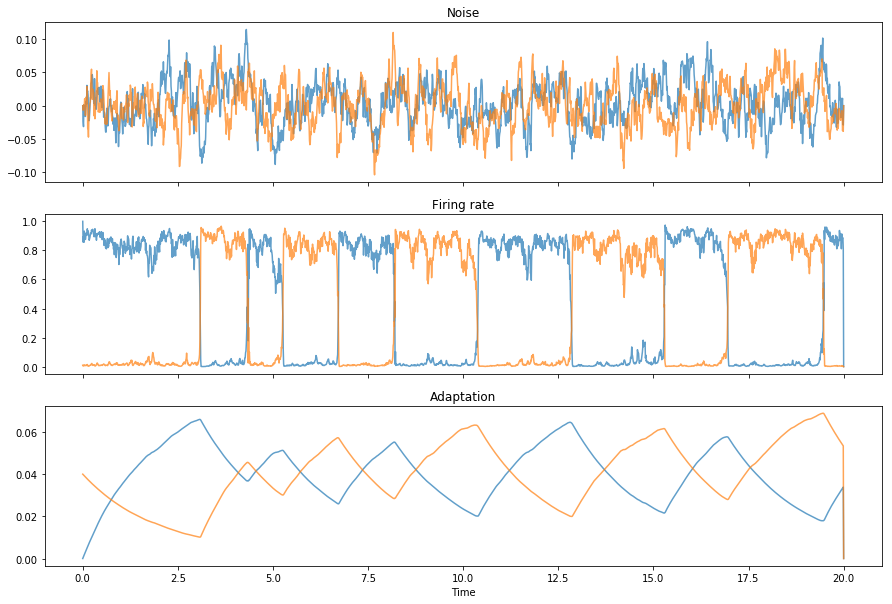

In [22]:
fig, axs = plt.subplots(3, 1, figsize = (15, 10), sharex = True)

axs[0].plot(t, n_A, alpha = 0.7)
axs[0].plot(t, n_B, alpha = 0.7)
axs[0].set_title('Noise')

axs[1].plot(t, r_A, alpha = 0.7)
axs[1].plot(t, r_B, alpha = 0.7)
axs[1].set_title('Firing rate')

axs[2].plot(t, alpha_A, alpha = 0.7)
axs[2].plot(t, alpha_B, alpha = 0.7)
axs[2].set_title('Adaptation')
axs[2].set_xlabel('Time')

plt.show()

### 5. 

In [23]:
# for t = 500
t = np.linspace(0, 500, 50001)

res = euler_maruyama(f_moreno_bote, gfun, x0, t)

In [24]:
r_A = res[:, 0]
r_B = res[:, 1]
alpha_A = res[:, 2]
alpha_B = res[:, 3]
n_A = res[:, 4]
n_B = res[:, 5]

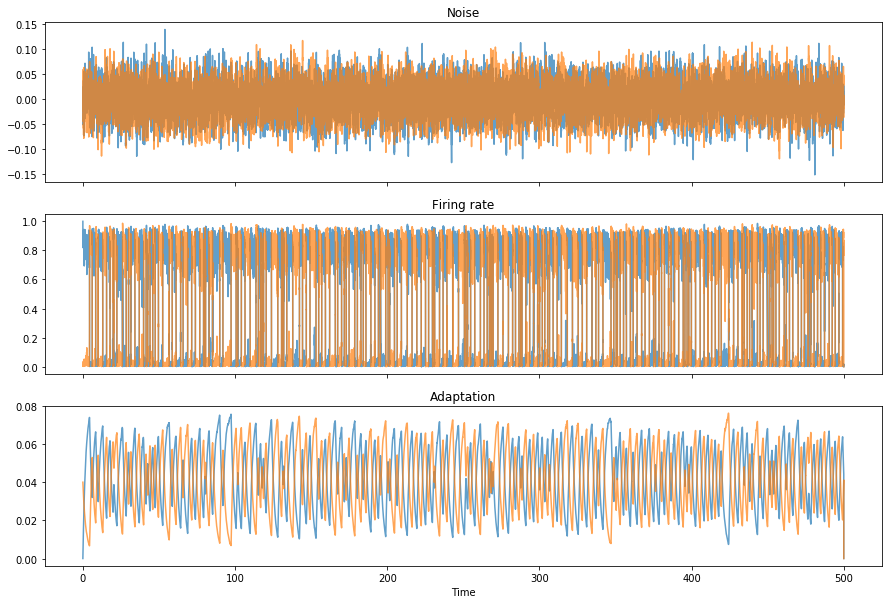

In [25]:
fig, axs = plt.subplots(3, 1, figsize = (15, 10), sharex = True)

axs[0].plot(t, n_A, alpha = 0.7)
axs[0].plot(t, n_B, alpha = 0.7)
axs[0].set_title('Noise')

axs[1].plot(t, r_A, alpha = 0.7)
axs[1].plot(t, r_B, alpha = 0.7)
axs[1].set_title('Firing rate')

axs[2].plot(t, alpha_A, alpha = 0.7)
axs[2].plot(t, alpha_B, alpha = 0.7)
axs[2].set_title('Adaptation')
axs[2].set_xlabel('Time')

plt.show()

In [26]:
dominance = dominance_durations(r_A, r_B, t)

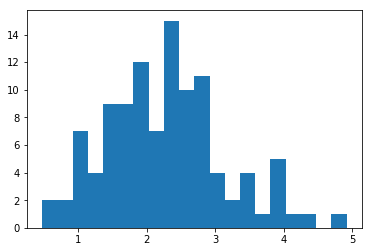

In [27]:
plt.hist(dominance, bins = 20)
plt.show()

In [28]:
print('The mean of the dominance durations is', np.mean(dominance))

The mean of the dominance durations is 2.269719626168223


### 6. 

In [29]:
# g_A = 0.05
# g_B = 0.05
# alpha = 0.75
# beta = 0.5
# gamma = 0
# phi = 0.5
# tau = 0.01
# tau_a = 2
# tau_b = 2
# tau_s = 0.1
# sigma = 0.03
# eta = 0.5

params = {'g_A' : '0.05', 'g_B' : '0.05', 'alpha' : '0.75', 'beta' :'0.5', 'gamma': '0', 'phi' : '0.5', 'tau' : '0.01', 'tau_a' : '2', 'tau_b' : '2', 'tau_s': '0.1', 'sigma' : '0.03', 'eta' : '0.5'}

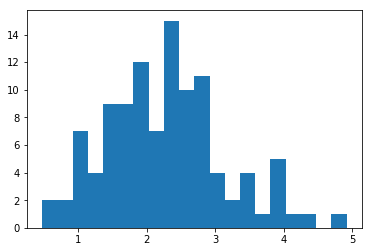

In [30]:
res = euler_maruyama(f_moreno_bote, gfun, x0, t, args = params)
dominance = dominance_durations(r_A, r_B, t)
plt.hist(dominance, bins = 20)
plt.show()

In [31]:
print('The mean of the dominance durations is', np.mean(dominance))

The mean of the dominance durations is 2.269719626168223
